Bundan sonra yapacagimiz islemleri temiz dosyalar uzerinden yapacagiz

Once elde ettigimiz imajlarin tekrar benzerlik matrisini elde edelim

In [1]:
#Drive'a erişim sağlıyoruz
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/derin_ogrenme/deeplearning

Mounted at /content/drive/
/content/drive/My Drive/derin_ogrenme/deeplearning


In [2]:
#Kütüphaneleri import ediyoruz
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [3]:
# model yüjklendi
vgg_model = VGG19(weights='imagenet')

# Son katman çıkartıldı çünkü sadece öznitelik istiyoruz tahmin değil
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# CNN özeti yazdırıldı
feat_extractor.summary()

574726144/574710816 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [4]:
#Dosya yolunda kaç fotoğraf var gösterildi
files = ['image_new/'+ x for x in os.listdir('image_new/') if "jpg" in x]
print('number of imgaes', len(files))

number of imgaes 2701


In [5]:
#Yine fotoğraf sınırları ve en yakın benzerlik sayısı berlilendi
imgs_model_width, imgs_model_height = 224,224

nb_closest_images = 10

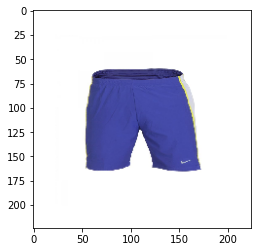

Fotoğraf başarıyla yüklendi!


In [6]:
#Bir adet fotoğraf gösterildi
original = load_img(files[455], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("Fotoğraf başarıyla yüklendi!")

In [7]:
#verilerin kerasta islenebilmesi icin PIL image turunu numpy image turune ceviriyoruz *(w,h,channel)->(h,w,channel)
numpy_image = img_to_array(original)

# (batchsize, height, width, channels)
#fotografa ek bir boyuyt ekliyoruz axis 0 icin.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# sonra modeli VGG modeli veya Resnet modeli icin hazirliyoruz fotograflarimizi
processed_image = preprocess_input(image_batch.copy())
print(len(files))

image batch size (1, 224, 224, 3)
2701


In [8]:
# Bir adet için özellik çıkarımı
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features
print(len(files))

features successfully extracted!
number of image features: 4096
2701


In [9]:
# Daha sonra modeli beslemek icin tum fotograflarimi yukluyoruz.

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [10]:
# Sonra tekrar tüm oznitelikleri cikartiyoruz

imgs_features = feat_extractor.predict(processed_imgs)

print("Öznitelikler çıkartıldı!")
imgs_features.shape

Öznitelikler çıkartıldı!


(2701, 4096)

In [11]:
#Dosyaları daha sonra Numeric verilerin benzerlik matrisiyle birleştireceğimizden dolayı sıralama işlemi yapıyoruz
#Sadece fotoğların numarasına göre veriler sıralanıyor
files=sorted(files, key=lambda x: float(x[10:-4]))
files

['image_new/1636.jpg',
 'image_new/1637.jpg',
 'image_new/1653.jpg',
 'image_new/1654.jpg',
 'image_new/1806.jpg',
 'image_new/1831.jpg',
 'image_new/1836.jpg',
 'image_new/2211.jpg',
 'image_new/2218.jpg',
 'image_new/2219.jpg',
 'image_new/2220.jpg',
 'image_new/2227.jpg',
 'image_new/2399.jpg',
 'image_new/2477.jpg',
 'image_new/2504.jpg',
 'image_new/2610.jpg',
 'image_new/2611.jpg',
 'image_new/2616.jpg',
 'image_new/2618.jpg',
 'image_new/2626.jpg',
 'image_new/2627.jpg',
 'image_new/2628.jpg',
 'image_new/2629.jpg',
 'image_new/2642.jpg',
 'image_new/2691.jpg',
 'image_new/2693.jpg',
 'image_new/2694.jpg',
 'image_new/2695.jpg',
 'image_new/2697.jpg',
 'image_new/2699.jpg',
 'image_new/2700.jpg',
 'image_new/2701.jpg',
 'image_new/2702.jpg',
 'image_new/2703.jpg',
 'image_new/2704.jpg',
 'image_new/2705.jpg',
 'image_new/2706.jpg',
 'image_new/2707.jpg',
 'image_new/2708.jpg',
 'image_new/2710.jpg',
 'image_new/2711.jpg',
 'image_new/2712.jpg',
 'image_new/2714.jpg',
 'image_new

In [12]:
# Burada kosinus benzerlik formulu ile elde edilen oz nitelik vektorlerinin benzerliklerini karsilastiriyoruz 

cosSimilarities = cosine_similarity(imgs_features)

# daha sonra da her bir fotograf icin bunlari bir data frame icersine kaydediyoruz

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()
#2549x2549lik bir benzerlik data frame'i olusturuldu.

,image_new/1636.jpg,image_new/1637.jpg,image_new/1653.jpg,image_new/1654.jpg,image_new/1806.jpg,image_new/1831.jpg,image_new/1836.jpg,image_new/2211.jpg,image_new/2218.jpg,image_new/2219.jpg,image_new/2220.jpg,image_new/2227.jpg,image_new/2399.jpg,image_new/2477.jpg,image_new/2504.jpg,image_new/2610.jpg,image_new/2611.jpg,image_new/2616.jpg,image_new/2618.jpg,image_new/2626.jpg,image_new/2627.jpg,image_new/2628.jpg,image_new/2629.jpg,image_new/2642.jpg,image_new/2691.jpg,image_new/2693.jpg,image_new/2694.jpg,image_new/2695.jpg,image_new/2697.jpg,image_new/2699.jpg,image_new/2700.jpg,image_new/2701.jpg,image_new/2702.jpg,image_new/2703.jpg,image_new/2704.jpg,image_new/2705.jpg,image_new/2706.jpg,image_new/2707.jpg,image_new/2708.jpg,image_new/2710.jpg,...,image_new/57506.jpg,image_new/57507.jpg,image_new/57508.jpg,image_new/57509.jpg,image_new/57530.jpg,image_new/57531.jpg,image_new/57849.jpg,image_new/57853.jpg,image_new/57854.jpg,image_new/57934.jpg,image_new/57935.jpg,image_new/57950.jpg,image_new/57980.jpg,image_new/58231.jpg,image_new/58326.jpg,image_new/58327.jpg,image_new/58328.jpg,image_new/58329.jpg,image_new/58458.jpg,image_new/58459.jpg,image_new/58460.jpg,image_new/58488.jpg,image_new/58815.jpg,image_new/59032.jpg,image_new/59033.jpg,image_new/59034.jpg,image_new/59035.jpg,image_new/59050.jpg,image_new/59051.jpg,image_new/59056.jpg,image_new/59146.jpg,image_new/59147.jpg,image_new/59326.jpg,image_new/59387.jpg,image_new/59388.jpg,image_new/59435.jpg,image_new/59757.jpg,image_new/59759.jpg,image_new/59761.jpg,image_new/59943.jpg
image_new/1636.jpg,1.000000,0.691818,0.696571,0.782520,0.781260,0.754996,0.475044,0.631202,0.707452,0.761740,0.742745,0.566055,0.686340,0.485179,0.712431,0.614509,0.629451,0.867955,0.831218,0.651211,0.674497,0.725105,0.641851,0.786411,0.764565,0.688313,0.777599,0.708077,0.694578,0.758961,0.700099,0.618428,0.760756,0.718129,0.642647,0.628602,0.695189,0.806368,0.576095,0.703862,...,0.564900,0.772145,0.630438,0.673000,0.565588,0.642527,0.660114,0.604247,0.705291,0.510427,0.450167,0.546462,0.757971,0.542152,0.518021,0.712923,0.513937,0.553124,0.642390,0.523321,0.574117,0.568197,0.687009,0.434176,0.751452,0.791064,0.683753,0.779934,0.669511,0.587211,0.610637,0.652678,0.827406,0.564452,0.711526,0.549520,0.667231,0.519684,0.773811,0.562982
image_new/1637.jpg,0.691818,1.000000,0.541142,0.651407,0.677671,0.695375,0.354844,0.436537,0.643926,0.717560,0.603328,0.594249,0.580958,0.440831,0.621339,0.574463,0.488268,0.702401,0.651338,0.389980,0.551387,0.624632,0.709435,0.658005,0.643953,0.684037,0.641245,0.490136,0.625789,0.660431,0.736317,0.740130,0.706460,0.590731,0.651426,0.526318,0.646644,0.758200,0.654269,0.630717,...,0.434782,0.650431,0.492118,0.508945,0.489352,0.485151,0.546204,0.466003,0.621138,0.324813,0.366628,0.488522,0.681022,0.437129,0.408882,0.473823,0.442728,0.373763,0.491583,0.381063,0.438981,0.498051,0.543098,0.326615,0.617196,0.684655,0.503788,0.640024,0.678549,0.527395,0.392055,0.465413,0.704408,0.380832,0.602097,0.452900,0.546146,0.370295,0.546060,0.544415
image_new/1653.jpg,0.696571,0.541142,1.000000,0.797367,0.745917,0.819201,0.366341,0.629464,0.745506,0.602892,0.755519,0.476180,0.546178,0.400196,0.559669,0.598685,0.682893,0.621726,0.744645,0.601563,0.670419,0.645851,0.521581,0.621291,0.859993,0.534246,0.715346,0.586733,0.642090,0.750198,0.591544,0.499697,0.593599,0.708173,0.491946,0.627665,0.528359,0.729977,0.463364,0.683630,...,0.435509,0.761054,0.495730,0.516549,0.482164,0.523908,0.472728,0.415547,0.807435,0.488438,0.409753,0.400633,0.653741,0.535814,0.483755,0.604894,0.391997,0.412634,0.585480,0.462866,0.512831,0.394765,0.538492,0.419665,0.627347,0.721120,0.490225,0.537808,0.570036,0.497381,0.408978,0.506029,0.711799,0.416033,0.792438,0.515656,0.536813,0.405978,0.793090,0.550443
image_new/1654.jpg,0.782520,0.651407,0.797367,1.000000,0.710684,0.839922,0.339702,0.550675,0.701259,0.703571,0.682366,0.552904,0.584299,0.382612,0.602255,0.542062,0.647828,0.691262,0.747455,0.547010,0.58979

In [13]:
#Kullanılacak benzerlik matrisini kaydediyoruz
cos_similarities_df.to_csv('cos_sim_processed.csv',index = False)

In [14]:
cos_similarities_df

,image_new/1636.jpg,image_new/1637.jpg,image_new/1653.jpg,image_new/1654.jpg,image_new/1806.jpg,image_new/1831.jpg,image_new/1836.jpg,image_new/2211.jpg,image_new/2218.jpg,image_new/2219.jpg,image_new/2220.jpg,image_new/2227.jpg,image_new/2399.jpg,image_new/2477.jpg,image_new/2504.jpg,image_new/2610.jpg,image_new/2611.jpg,image_new/2616.jpg,image_new/2618.jpg,image_new/2626.jpg,image_new/2627.jpg,image_new/2628.jpg,image_new/2629.jpg,image_new/2642.jpg,image_new/2691.jpg,image_new/2693.jpg,image_new/2694.jpg,image_new/2695.jpg,image_new/2697.jpg,image_new/2699.jpg,image_new/2700.jpg,image_new/2701.jpg,image_new/2702.jpg,image_new/2703.jpg,image_new/2704.jpg,image_new/2705.jpg,image_new/2706.jpg,image_new/2707.jpg,image_new/2708.jpg,image_new/2710.jpg,...,image_new/57506.jpg,image_new/57507.jpg,image_new/57508.jpg,image_new/57509.jpg,image_new/57530.jpg,image_new/57531.jpg,image_new/57849.jpg,image_new/57853.jpg,image_new/57854.jpg,image_new/57934.jpg,image_new/57935.jpg,image_new/57950.jpg,image_new/57980.jpg,image_new/58231.jpg,image_new/58326.jpg,image_new/58327.jpg,image_new/58328.jpg,image_new/58329.jpg,image_new/58458.jpg,image_new/58459.jpg,image_new/58460.jpg,image_new/58488.jpg,image_new/58815.jpg,image_new/59032.jpg,image_new/59033.jpg,image_new/59034.jpg,image_new/59035.jpg,image_new/59050.jpg,image_new/59051.jpg,image_new/59056.jpg,image_new/59146.jpg,image_new/59147.jpg,image_new/59326.jpg,image_new/59387.jpg,image_new/59388.jpg,image_new/59435.jpg,image_new/59757.jpg,image_new/59759.jpg,image_new/59761.jpg,image_new/59943.jpg
image_new/1636.jpg,1.000000,0.691818,0.696571,0.782520,0.781260,0.754996,0.475044,0.631202,0.707452,0.761740,0.742745,0.566055,0.686340,0.485179,0.712431,0.614509,0.629451,0.867955,0.831218,0.651211,0.674497,0.725105,0.641851,0.786411,0.764565,0.688313,0.777599,0.708077,0.694578,0.758961,0.700099,0.618428,0.760756,0.718129,0.642647,0.628602,0.695189,0.806368,0.576095,0.703862,...,0.564900,0.772145,0.630438,0.673000,0.565588,0.642527,0.660114,0.604247,0.705291,0.510427,0.450167,0.546462,0.757971,0.542152,0.518021,0.712923,0.513937,0.553124,0.642390,0.523321,0.574117,0.568197,0.687009,0.434176,0.751452,0.791064,0.683753,0.779934,0.669511,0.587211,0.610637,0.652678,0.827406,0.564452,0.711526,0.549520,0.667231,0.519684,0.773811,0.562982
image_new/1637.jpg,0.691818,1.000000,0.541142,0.651407,0.677671,0.695375,0.354844,0.436537,0.643926,0.717560,0.603328,0.594249,0.580958,0.440831,0.621339,0.574463,0.488268,0.702401,0.651338,0.389980,0.551387,0.624632,0.709435,0.658005,0.643953,0.684037,0.641245,0.490136,0.625789,0.660431,0.736317,0.740130,0.706460,0.590731,0.651426,0.526318,0.646644,0.758200,0.654269,0.630717,...,0.434782,0.650431,0.492118,0.508945,0.489352,0.485151,0.546204,0.466003,0.621138,0.324813,0.366628,0.488522,0.681022,0.437129,0.408882,0.473823,0.442728,0.373763,0.491583,0.381063,0.438981,0.498051,0.543098,0.326615,0.617196,0.684655,0.503788,0.640024,0.678549,0.527395,0.392055,0.465413,0.704408,0.380832,0.602097,0.452900,0.546146,0.370295,0.546060,0.544415
image_new/1653.jpg,0.696571,0.541142,1.000000,0.797367,0.745917,0.819201,0.366341,0.629464,0.745506,0.602892,0.755519,0.476180,0.546178,0.400196,0.559669,0.598685,0.682893,0.621726,0.744645,0.601563,0.670419,0.645851,0.521581,0.621291,0.859993,0.534246,0.715346,0.586733,0.642090,0.750198,0.591544,0.499697,0.593599,0.708173,0.491946,0.627665,0.528359,0.729977,0.463364,0.683630,...,0.435509,0.761054,0.495730,0.516549,0.482164,0.523908,0.472728,0.415547,0.807435,0.488438,0.409753,0.400633,0.653741,0.535814,0.483755,0.604894,0.391997,0.412634,0.585480,0.462866,0.512831,0.394765,0.538492,0.419665,0.627347,0.721120,0.490225,0.537808,0.570036,0.497381,0.408978,0.506029,0.711799,0.416033,0.792438,0.515656,0.536813,0.405978,0.793090,0.550443
image_new/1654.jpg,0.782520,0.651407,0.797367,1.000000,0.710684,0.839922,0.339702,0.550675,0.701259,0.703571,0.682366,0.552904,0.584299,0.382612,0.602255,0.542062,0.647828,0.691262,0.747455,0.547010,0.58979

In [15]:
#Yedekleme
cos_similarities_df.to_csv('cos_sim_processed_1.csv',index= True,index_label = files)

In [16]:
#Benzerlik matrisimizde herhangi bir boş deger var mi kontrol ediyoruz
cos_similarities_df.describe()
cos_similarities_df.isna().any()

image_new/1636.jpg     False
image_new/1637.jpg     False
image_new/1653.jpg     False
image_new/1654.jpg     False
image_new/1806.jpg     False
                       ...  
image_new/59435.jpg    False
image_new/59757.jpg    False
image_new/59759.jpg    False
image_new/59761.jpg    False
image_new/59943.jpg    False
Length: 2701, dtype: bool

In [17]:
#Data Frame hakkında bilgileri alıyoruz
cos_similarities_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, image_new/1636.jpg to image_new/59943.jpg
Columns: 2701 entries, image_new/1636.jpg to image_new/59943.jpg
dtypes: float32(2701)
memory usage: 27.9+ MB


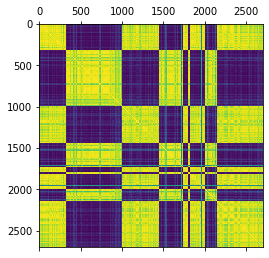

In [18]:
#Fotoğraflar arasındaki benzerlik korelasyonunu gösteriyoruz
plt.matshow(cos_similarities_df.corr())
plt.savefig('correlation.jpg')
plt.show()


In [ ]:

from easyimages import EasyImageList

In [ ]:
#Fotoğrafları listeliyoruz
Li = EasyImageList.from_folder('image_new/')
Li.symlink_images()
Li.html(sample = 100,size = 44)                              